In [4]:
# -*- coding: utf-8-*-
import pandas as pd
from datetime import datetime, date, time
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
import pyart
import matplotlib.ticker as mtick
import matplotlib.dates as dates
import os,sys
% matplotlib inline

In [5]:
def make_dir(path):
    """
    Makes directory based on path.
    :param path:
    :return:
    """
    if not os.path.exists(path):
        os.makedirs(path)

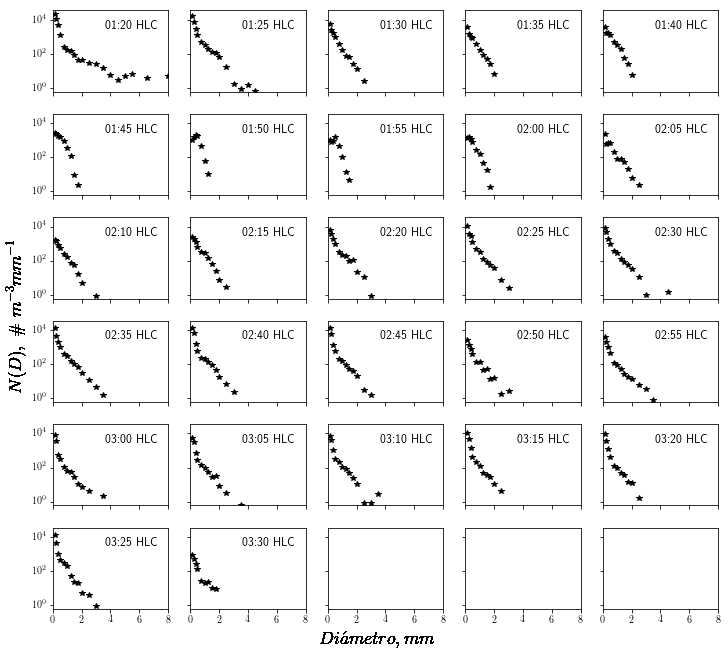

In [6]:
save_figs = '../results/80/figs_doc'
make_dir(save_figs)
path_pks = '/media/alfonso/46CE677FCE676661/ALFONSO/UNIVERSIDAD/repositorios/thesis/pks/80'

inicio = '2016-09-10 01:15:00'
fin = '2016-09-10 03:40:00'
lis = pd.date_range(inicio, fin, freq='5min')
total = len(lis)

filas = total // 5
residuo = total % 5

# if residuo > 0:
#     filas += 1
    
fig, arrax = plt.subplots(nrows=filas, ncols=5, sharex=True, sharey=True, figsize=(10,9)) 


for i,fecha in enumerate(lis):
    fil = (i - 1) / 5
    col = (i - 1) % 5
    a = datetime.strftime(fecha, format='%Y-%m-%d %H:%M:%S')
    title = datetime.strftime(fecha, format='%H:%M') + ' HLC'
    b = 'sr_nd_{}.pkl'.format(a)
    pks_file = '{}/{}'.format(path_pks,b)
    
    try:
        red = pd.read_pickle(pks_file)
        plt.semilogy(True)

        plt.rc('text', fontsize=14, usetex=True)
        arrax[fil][col].plot(red.index, red, 'k*')
        arrax[fil][col].set_title(title,  position=(0.68, 0.70), fontsize=12)
        arrax[fil][col].set_xlim([0,8])
        arrax[fil][col].set_xticks([0,2,4,6,8])
        arrax[fil][col].set_yticks([10**0,10**2,10**4])

        plt.tight_layout()
        fig.text(0.5, 0.00, r'$Di\acute{a}metro, mm$', ha='center', va='center', fontsize=18)
        fig.text(0.00, 0.5, '$N(D), \ \# \ m^{-3} mm^{-1} $', ha='center', va='center', 
                 rotation='vertical',fontsize=18)
        
        

    except IOError, e:
#         print (e)
        continue
plt.savefig('{}/nd_2d_80.png'.format(save_figs), type='png', bbox_inches='tight', dpi=150)

In [4]:
path_pks = '/media/alfonso/46CE677FCE676661/ALFONSO/UNIVERSIDAD/repositorios/thesis/pks/80'
path_pks_nt = '/media/alfonso/46CE677FCE676661/ALFONSO/UNIVERSIDAD/repositorios/Varios/results/80/pks/nt'
path_pks_w = '/media/alfonso/46CE677FCE676661/ALFONSO/UNIVERSIDAD/repositorios/Varios/results/80/pks/W'
path_pks_R = '/media/alfonso/46CE677FCE676661/ALFONSO/UNIVERSIDAD/repositorios/Varios/results/80/pks/R'
path_pks_Z = '/media/alfonso/46CE677FCE676661/ALFONSO/UNIVERSIDAD/repositorios/Varios/results/80/pks/Z'

inicio = '2016-09-10 01:00:00'
fin = '2016-09-10 03:50:00'
lis = pd.date_range(inicio, fin, freq='1min')

df_nd = pd.DataFrame(columns=lis)
df_nt = pd.DataFrame(columns=lis)
df_w = pd.DataFrame(columns=lis)
df_R= pd.DataFrame(columns=lis)
df_Z = pd.DataFrame(columns=lis)

for i,fecha in enumerate(lis):

    a = datetime.strftime(fecha, format='%Y-%m-%d %H:%M:%S')
    title = datetime.strftime(fecha, format='%H:%M') + ' HLC'
    b = 'sr_nd_{}.pkl'.format(a)
    pks_file = '{}/{}'.format(path_pks,b)
    
    nt = 'sr_nt_{}.pkl'.format(a)
    pk_nt = '{}/{}'.format(path_pks_nt, nt)
    
    w = 'sr_W_{}.pkl'.format(a)
    pk_w = '{}/{}'.format(path_pks_w, w)
    
    R = 'sr_R_{}.pkl'.format(a)
    pk_R = '{}/{}'.format(path_pks_R, R)
    
    Z = 'sr_Z_{}.pkl'.format(a)
    pk_Z = '{}/{}'.format(path_pks_Z, Z) 
    
    try:
        df_nd[fecha] = pd.read_pickle(pks_file)
        df_nt[fecha] = pd.read_pickle(pk_nt)
        df_w[fecha] = pd.read_pickle(pk_w)
        df_R[fecha] = pd.read_pickle(pk_R)
        df_Z[fecha] = pd.read_pickle(pk_Z) 

    except IOError, e:
#         print (e)
        continue
df_nd.replace(to_replace=0.0, value=np.nan, inplace=True)
df_nd = np.log10(df_nd)
df_Z.replace(to_replace=0.0, value=np.nan, inplace=True)
df_Z = np.log10(df_Z)
df_R.replace(to_replace=0.0, value=np.nan, inplace=True)
df_w.replace(to_replace=0.0, value=np.nan, inplace=True)
df_w = np.log10(df_w)

In [5]:
cdict = {'red': ((0., 1, 1),
                 (0.05, 1, 1),
                 (0.11, 0, 0),
                 (0.66, 1, 1),
                 (0.89, 1, 1),
                 (1, 0.5, 0.5)),
         'green': ((0., 1, 1),
                   (0.05, 1, 1),
                   (0.11, 0, 0),
                   (0.375, 1, 1),
                   (0.64, 1, 1),
                   (0.91, 0, 0),
                   (1, 0, 0)),
         'blue': ((0., 1, 1),
                  (0.05, 1, 1),
                  (0.11, 1, 1),
                  (0.34, 1, 1),
                  (0.65, 0, 0),
                  (1, 0, 0))}

my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)

/home/alfonso/anaconda2/lib/python2.7/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


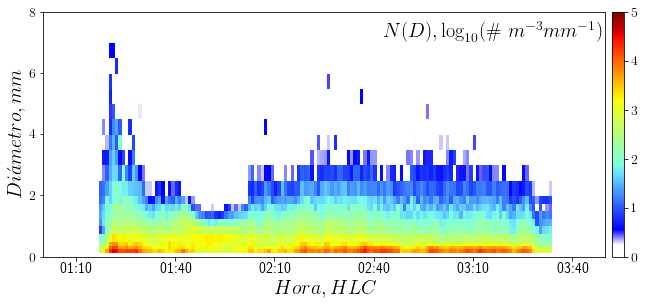

In [6]:
# -*- coding: utf-8 -*-
plt.figure(figsize=(12,4.5))
plt.rc('text', fontsize=14, usetex=True)
plt.pcolormesh(df_nd.columns, df_nd.index.values, df_nd, vmin=0, vmax=5, cmap=my_cmap)
plt.colorbar(pad=0.01, aspect=20).set_ticks(np.arange(0,6,1))
plt.ylabel(r'$Di\acute{a}metro, mm$', fontsize='x-large')
plt.yticks(np.arange(0,9,2))
plt.xlabel('$Hora, HLC$', fontsize='x-large')
plt.title('$N(D), \log_{10} (\# \ m^{-3} mm^{-1}) $',  position=(0.8, 0.85), fontsize='x-large')
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M')) 
plt.savefig('{}/nd_3d_80.png'.format(save_figs), type='png', bbox_inches='tight', dpi=150)

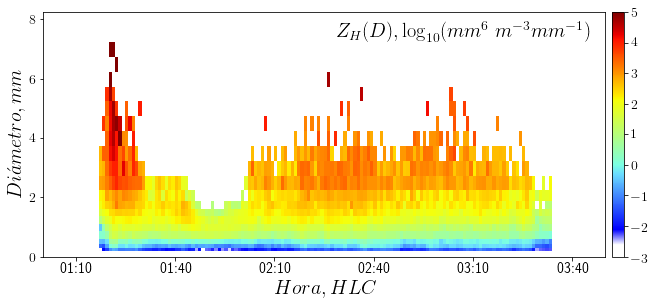

In [7]:
# -*- coding: utf-8 -*-
plt.figure(figsize=(12,4.5))
plt.rc('text', fontsize=14, usetex=True)
plt.pcolormesh(df_Z.columns, df_Z.index.values, df_Z, vmin=-3, vmax=5, cmap=my_cmap)
plt.colorbar(pad=0.01, aspect=20).set_ticks(np.arange(-3,6,1))
plt.ylabel(r'$Di\acute{a}metro, mm$', fontsize='x-large')
plt.yticks(np.arange(0,9,2))
plt.xticks(usetex=True)
plt.xlabel('$Hora, HLC$', fontsize='x-large')
plt.title('$Z_H(D), \log_{10} (mm^{6} \  m^{-3} mm^{-1}) $',  position=(0.75, 0.85), fontsize='x-large')
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M')) 
plt.savefig('{}/Z_3d_80.png'.format(save_figs), type='png', bbox_inches='tight', dpi=150)

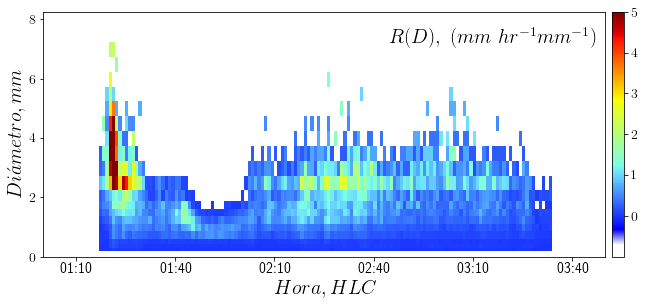

In [8]:
# -*- coding: utf-8 -*-
plt.figure(figsize=(12,4.5))
plt.rc('text', fontsize=14, usetex=True)
plt.pcolormesh(df_R.columns, df_R.index.values, df_R, vmin=-1, vmax=5, cmap=my_cmap)
plt.colorbar(pad=0.01, aspect=20).set_ticks(np.arange(0,6,1))
plt.ylabel(r'$Di\acute{a}metro, mm$', fontsize='x-large')
plt.yticks(np.arange(0,9,2))
plt.xlabel('$Hora, HLC$', fontsize='x-large')
plt.title('$R(D),\ (mm\ hr^{-1} mm^{-1}) $',  position=(0.8, 0.85), fontsize='x-large')
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M')) 
plt.savefig('{}/R_3d_80.png'.format(save_figs), type='png', bbox_inches='tight', dpi=150)

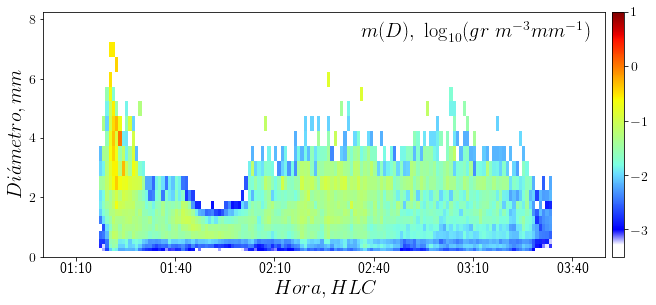

In [11]:
# -*- coding: utf-8 -*-
plt.figure(figsize=(12,4.5))
plt.rc('text', fontsize=14, usetex=True)
plt.pcolormesh(df_w.columns, df_w.index.values, df_w, vmin=-3.5, vmax=1.0, cmap=my_cmap)
plt.colorbar(pad=0.01, aspect=20).set_ticks(np.arange(-3,2,1))
plt.ylabel(r'$Di\acute{a}metro, mm$', fontsize='x-large')
plt.yticks(np.arange(0,9,2))
plt.xlabel('$Hora, HLC$', fontsize='x-large')
plt.title('$m(D),\ \log_{10} (gr \  m^{-3} mm^{-1}) $',  position=(0.77, 0.85), fontsize='x-large')
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M')) 
plt.savefig('{}/W_3d_80.png'.format(save_figs), type='png', bbox_inches='tight', dpi=150)

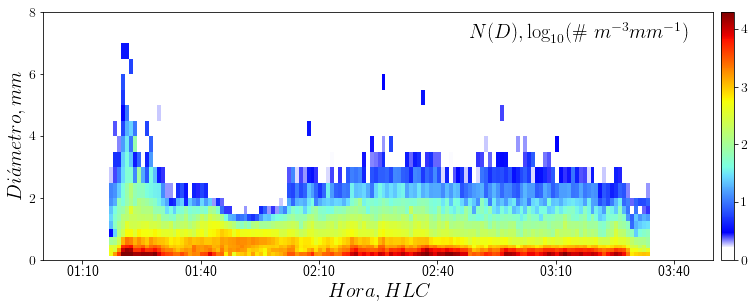

In [10]:
inicio = '2016-09-10 01:00:00'
fin = '2016-09-10 03:50:00'
lis = pd.date_range(inicio, fin, freq='1min')
df_fig = pd.DataFrame(columns=lis)
df_ref = pd.DataFrame(columns=lis)

for i,fecha in enumerate(lis):
    a = datetime.strftime(fecha, format='%Y-%m-%d %H:%M:%S')
    title = datetime.strftime(fecha, format='%H:%M') + ' HLC'
    b = 'sr_nd_{}.pkl'.format(a)
    pks_file = '{}/{}'.format(path_pks,b)
        
    try:
        df_fig[fecha] = pd.read_pickle(pks_file)
        
    except IOError, e:

#         print (e)
        continue
df_fig.replace(to_replace=0.0, value=np.nan, inplace=True)
df_fig = np.log10(df_fig)

# -*- coding: utf-8 -*-
plt.figure(figsize=(12,4.5))
plt.rc('text', fontsize=14, usetex=True)
plt.pcolormesh(df_fig.columns, df_fig.index.values, df_fig, vmin=0, vmax=4.3, cmap=my_cmap)
plt.colorbar(pad=0.01, aspect=20).set_ticks(np.arange(0,5,1))
plt.ylabel(r'$Di\acute{a}metro, mm$', fontsize='x-large')
plt.yticks(np.arange(0,9,2))
plt.xlabel('$Hora, HLC$', fontsize='x-large')
plt.title('$N(D), \log_{10} (\# \ m^{-3} mm^{-1}) $',  position=(0.8, 0.85), fontsize='x-large')
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M')) 
plt.savefig('/home/alfonso/Desktop/nd_3d_80.png', type='png', bbox_inches='tight', dpi=150)

plt.tight_layout()